<a href="https://colab.research.google.com/github/panimesh14/user-relevance-scoring-model-improved/blob/main/31_Dec_Jan_01_Profile_Relevance_Scoring_Statistical_Model_User_Details.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Majority Voting/Ensemble Model-Logistic Regression, Random Forest Classifier, Linear SVM, Multinomial, Gaussian and Bernoulli Naive Bayes**

# Standard Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

# Data Loading

In [ ]:
details_user =pd.read_csv('user_details_college_company - Sheet2.csv');
details_user.head()

,username,booking_count,gross_earning,core_earning,profile_views,firstbooking,lastbooking,active_days,date_joined,age_in_days,title,description,currenc,followers,company name,company tier numerical,college name,college tier numerical,industry,Industry_numerical,years of experience,# of posts/week,avg engagement per post last 30 days,title.1,user summary,# of Posts last 30 days,# of Comments last 30 days,# of Reactions last 30 days,Gender,gender_score,# of promotional posts
0,anshul0,3107,138633,138293,5813,26-12-2021,22-12-2022,360,20-12-2021,367,Founder @Tech and Target | Helping Students in...,NaN,INR,6705.0,topmate.io,5.0,GLA University,7.0,Software Developer,9.0,5.0,1.166667,13.0,Founder@Tech and Target | Youtuber | 140k+ Sub...,I am a final year undergraduate pursuing Compu...,1.0,0.0,0.0,male,1,1.0
1,PratikShrivastava,1743,31437,31437,323,05-01-2022,24-12-2022,353,23-12-2021,353,10+ Yrs Exp | R&D Specialist at Nokia Networks...,"Hi, This is Pratik Shrivastava here. I have 10...",INR,8619.0,OnlineStudy4U,5.0,ramaiah-institute-of-technology,6.0,Software Developer,9.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,lokesh_bagora,1624,18275,18275,652,10-01-2022,09-10-2022,271,10-01-2022,271,"Mock Interview , Career Guidance , Placement P...","Hello, everyone, I am Lokesh Bagora from Indor...",INR,NaN,Self,5.0,Shivajirao Kadam Institute of Technology and ...,6.0,Software Developer,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,deepika_rajagopal,1585,1782,1782,2800,31-01-2022,31-03-2022,59,31-01-2022,59,IT proffesional | Help aspiring fresher's in c...,Deepika Here !\nI am the content creator of On...,INR,NaN,OnlineStudy4U,5.0,NaN,5.0,Software Developer,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,shreya_gupta,862,9050,9050,3000,01-02-2022,26-03-2022,52,23-02-2022,52,"Mock Interview(All MNCs), Career Guidance, Pla...","Hello, I am Shreya Gupta pursuing my final yea...",INR,1363.0,Ernst & Young Global Consulting Services,8.0,Noida Institute of Engineering & Technology,7.0,User Summary:\nI am a recent college graduate ...,6.0,2.0,0.000000,0.0,Analyst in Ernst and Young,0,0.0,0.0,0.0,female,0,0.0


In [ ]:
details_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   username                              2478 non-null   object 
 1   booking_count                         2478 non-null   int64  
 2   gross_earning                         2478 non-null   int64  
 3   core_earning                          2478 non-null   int64  
 4   profile_views                         2478 non-null   int64  
 5   firstbooking                          2478 non-null   object 
 6   lastbooking                           2478 non-null   object 
 7   active_days                           2478 non-null   int64  
 8   date_joined                           2478 non-null   object 
 9   age_in_days                           2478 non-null   int64  
 10  title                                 1617 non-null   object 
 11  description      

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
details_user.head(2)

,username,booking_count,gross_earning,core_earning,profile_views,firstbooking,lastbooking,active_days,date_joined,age_in_days,title,description,currenc,followers,company name,company tier numerical,college name,college tier numerical,industry,Industry_numerical,years of experience,# of posts/week,avg engagement per post last 30 days,title.1,user summary,# of Posts last 30 days,# of Comments last 30 days,# of Reactions last 30 days,Gender,gender_score,# of promotional posts
0,anshul0,3107,138633,138293,5813,26-12-2021,22-12-2022,360,20-12-2021,367,Founder @Tech and Target | Helping Students in...,NaN,INR,6705.0,topmate.io,5.0,GLA University,7.0,Software Developer,9.0,5.0,1.166667,13.0,Founder@Tech and Target | Youtuber | 140k+ Sub...,I am a final year undergraduate pursuing Compu...,1.0,0.0,0.0,male,1,1.0
1,PratikShrivastava,1743,31437,31437,323,05-01-2022,24-12-2022,353,23-12-2021,353,10+ Yrs Exp | R&D Specialist at Nokia Networks...,"Hi, This is Pratik Shrivastava here. I have 10...",INR,8619.0,OnlineStudy4U,5.0,ramaiah-institute-of-technology,6.0,Software Developer,9.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


### Data Filtering 

In [ ]:
details_profile_int=details_user[['booking_count', 'age_in_days','core_earning','active_days', 'followers', 'company tier numerical', 'college tier numerical', 'Industry_numerical', 'years of experience', '# of posts/week', 'avg engagement per post last 30 days', '# of Posts last 30 days', '# of Comments last 30 days', '# of Reactions last 30 days', 'Gender', 'gender_score','# of promotional posts']]

In [ ]:
details_profile_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   booking_count                         2478 non-null   int64  
 1   age_in_days                           2478 non-null   int64  
 2   core_earning                          2478 non-null   int64  
 3   active_days                           2478 non-null   int64  
 4   followers                             1818 non-null   float64
 5   company tier numerical                1851 non-null   float64
 6   college tier numerical                1916 non-null   float64
 7   Industry_numerical                    1875 non-null   float64
 8   years of experience                   1786 non-null   float64
 9   # of posts/week                       1779 non-null   float64
 10  avg engagement per post last 30 days  1779 non-null   float64
 11  # of Posts last 3

In [ ]:
details_profile_int.drop(['Gender'],axis=1,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13552\1072870759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  details_profile_int.drop(['Gender'],axis=1,inplace=True)


In [ ]:
details_profile_int.drop(['Industry_numerical'],axis=1,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13552\4081263990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  details_profile_int.drop(['Industry_numerical'],axis=1,inplace=True)


In [ ]:
details_profile_int.columns

Index(['booking_count', 'age_in_days', 'core_earning', 'active_days',
       'followers', 'company tier numerical', 'college tier numerical',
       'years of experience', '# of posts/week',
       'avg engagement per post last 30 days', '# of Posts last 30 days',
       '# of Comments last 30 days', '# of Reactions last 30 days',
       'gender_score', '# of promotional posts'],
      dtype='object')

# Exploratory Data Analysis

In [ ]:
details_profile_int['gender_score'].head(7)

0    1
1    1
2    1
3    0
4    0
5    0
6    1
Name: gender_score, dtype: int64

In [ ]:
details_profile_int.isna().nunique()
#followers, company tier numerical, college tier numerical, years of experience, # of posts/week, avg engagement per post last 30 days, # of posts last 30 days, # of Comments last 30 days, # of Reactions last 30 days, Gender, # of promotional posts

booking_count                           1
age_in_days                             1
core_earning                            1
active_days                             1
followers                               2
company tier numerical                  2
college tier numerical                  2
years of experience                     2
# of posts/week                         2
avg engagement per post last 30 days    2
# of Posts last 30 days                 2
# of Comments last 30 days              2
# of Reactions last 30 days             2
gender_score                            1
# of promotional posts                  2
dtype: int64

In [ ]:
details_profile_int.isnull().sum()

booking_count                             0
age_in_days                               0
core_earning                              0
active_days                               0
followers                               660
company tier numerical                  627
college tier numerical                  562
years of experience                     692
# of posts/week                         699
avg engagement per post last 30 days    699
# of Posts last 30 days                 699
# of Comments last 30 days              699
# of Reactions last 30 days             699
gender_score                              0
# of promotional posts                  699
dtype: int64

In [ ]:
len(details_profile_int)

2478

In [ ]:
100*details_profile_int.isnull().sum()/len(details_profile_int)

booking_count                            0.000000
age_in_days                              0.000000
core_earning                             0.000000
active_days                              0.000000
followers                               26.634383
company tier numerical                  25.302663
college tier numerical                  22.679580
years of experience                     27.925747
# of posts/week                         28.208232
avg engagement per post last 30 days    28.208232
# of Posts last 30 days                 28.208232
# of Comments last 30 days              28.208232
# of Reactions last 30 days             28.208232
gender_score                             0.000000
# of promotional posts                  28.208232
dtype: float64

In [ ]:
#Dropping Nans
details_profile_int_dr = details_profile_int.dropna()
len(details_profile_int_dr)

1714

In [ ]:
data_ret = len(details_profile_int_dr)/len(details_profile_int)
data_loss = 1-data_ret
data_loss

0.3083131557707829

def gen_to_bin(x):
    if(x=='male'):
        return 0
    else:
        return 1

details_profile_int_dr['Gender'] = details_profile_int_dr['Gender'].apply(gen_to_bin)
details_profile_int_dr['Gender']

In [ ]:
details_profile_int_dr.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1714 entries, 0 to 2477
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   booking_count                         1714 non-null   int64  
 1   age_in_days                           1714 non-null   int64  
 2   core_earning                          1714 non-null   int64  
 3   active_days                           1714 non-null   int64  
 4   followers                             1714 non-null   float64
 5   company tier numerical                1714 non-null   float64
 6   college tier numerical                1714 non-null   float64
 7   years of experience                   1714 non-null   float64
 8   # of posts/week                       1714 non-null   float64
 9   avg engagement per post last 30 days  1714 non-null   float64
 10  # of Posts last 30 days               1714 non-null   float64
 11  # of Comments las

C:\Users\Admin\AppData\Local\Temp\ipykernel_13552\705440137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  details_profile_int_dr['target_score']=np.tanh(details_profile_int_dr['core_earning']/(details_profile_int_dr['active_days']+1))


<AxesSubplot: >

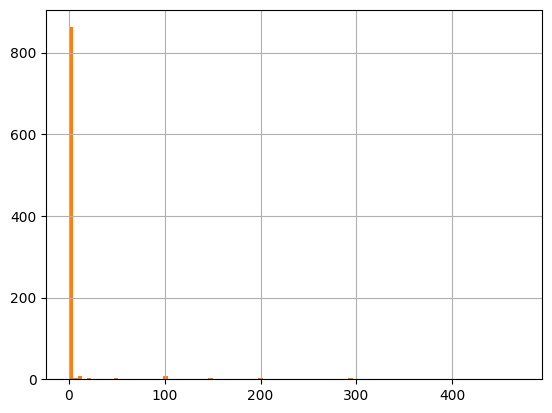

In [ ]:
details_profile_int_dr['target_score']=np.tanh(details_profile_int_dr['core_earning']/(details_profile_int_dr['active_days']+1))
details_profile_int_dr['target_score'].hist(bins=100)
details_profile_int_dr[details_profile_int_dr['target_score']<0.9]['core_earning'].hist(bins=100)

<AxesSubplot: >

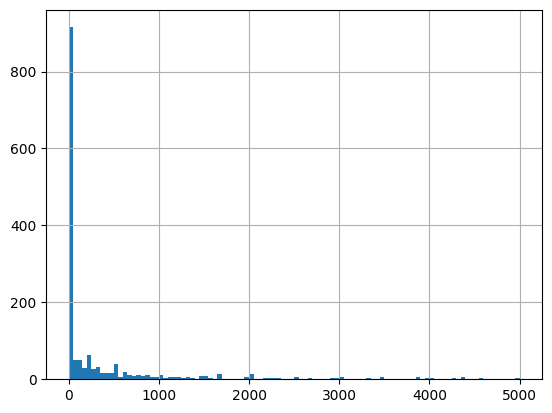

In [ ]:
details_profile_int_dr[details_profile_int_dr['core_earning']<5000]['core_earning'].hist(bins=100)

<AxesSubplot: >

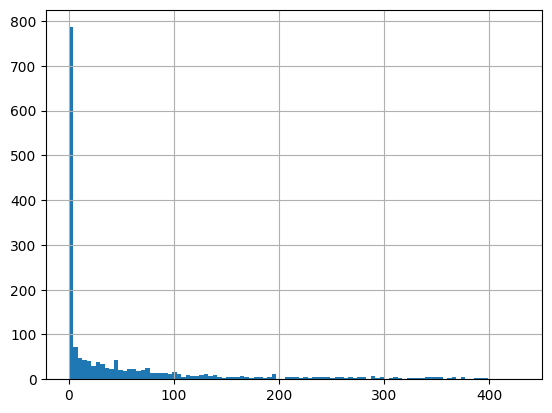

In [ ]:
details_profile_int_dr['active_days'].hist(bins=100)

<AxesSubplot: >

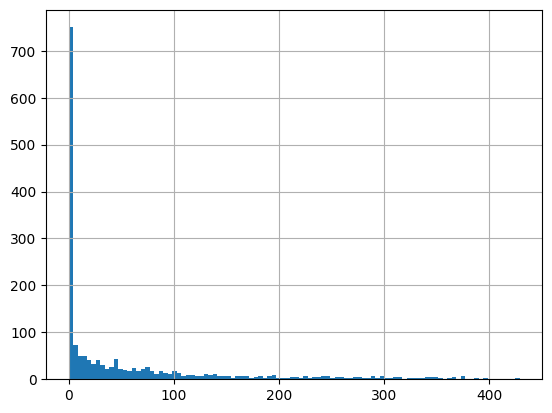

In [ ]:
details_profile_int_dr['age_in_days'].hist(bins=100)

<AxesSubplot: >

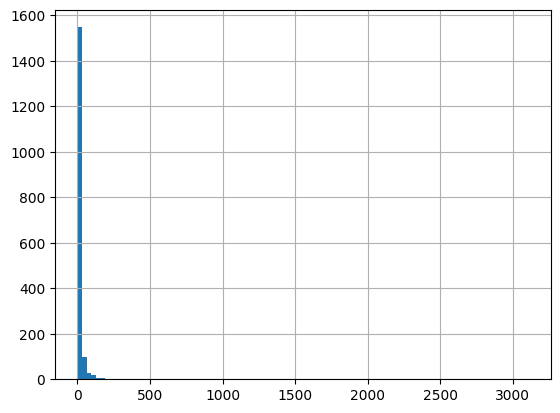

In [ ]:
details_profile_int_dr['booking_count'].hist(bins=100)

<AxesSubplot: >

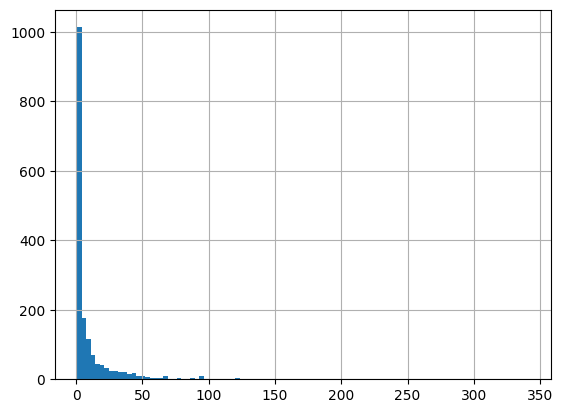

In [ ]:
details_profile_int_dr[details_profile_int_dr['booking_count']<400]['booking_count'].hist(bins=100)

<AxesSubplot: >

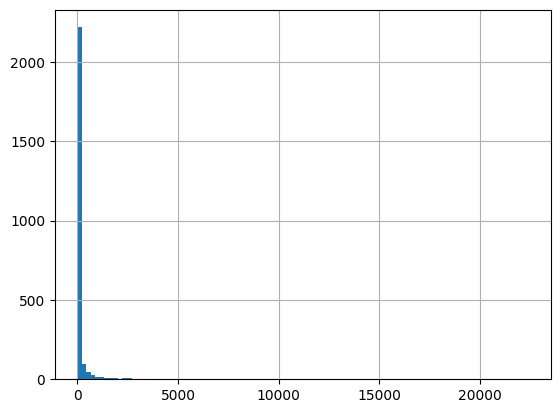

In [ ]:
details_user['profile_views'].hist(bins=100)

<AxesSubplot: >

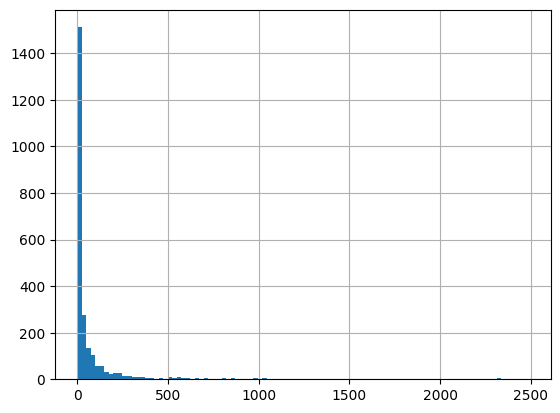

In [ ]:
details_user[details_user['profile_views']<2500]['profile_views'].hist(bins=100)

In [ ]:
details = details_profile_int_dr
details.head()

,booking_count,age_in_days,core_earning,active_days,followers,company tier numerical,college tier numerical,years of experience,# of posts/week,avg engagement per post last 30 days,# of Posts last 30 days,# of Comments last 30 days,# of Reactions last 30 days,gender_score,# of promotional posts,target_score
0,3107,367,138293,360,6705.0,5.0,7.0,5.0,1.166667,13.000000,1.0,0.0,0.0,1,1.0,1.0
4,862,52,9050,52,1363.0,8.0,7.0,2.0,0.000000,0.000000,0.0,0.0,0.0,0,0.0,1.0
5,806,365,12866,365,106015.0,9.0,7.0,4.0,13.066667,299.285714,28.0,8.0,12.0,0,25.0,1.0
7,423,250,14157,250,2552.0,9.0,7.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0,0.0,1.0
8,341,311,67760,311,3369.0,9.0,7.0,8.0,0.000000,0.000000,0.0,0.0,0.0,1,0.0,1.0


In [ ]:
details_profile_int_dr.describe()

,booking_count,age_in_days,core_earning,active_days,followers,company tier numerical,college tier numerical,years of experience,# of posts/week,avg engagement per post last 30 days,# of Posts last 30 days,# of Comments last 30 days,# of Reactions last 30 days,gender_score,# of promotional posts,target_score
count,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000
mean,15.004084,56.071179,3147.415403,53.864061,10109.089265,8.209452,7.864644,5.116103,1.233619,93.148367,3.075846,1.217036,1.100350,0.806884,1.055426,0.488530
std,84.700713,89.703544,19312.133771,88.865376,25474.115995,1.284377,1.054996,3.986689,2.332667,380.899724,6.438815,2.787603,2.950332,0.394858,2.679377,0.492664
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1649.250000,7.250000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3.000000,11.000000,1.000000,8.000000,3732.500000,8.000000,8.000000,4.000000,0.245614,9.666667,0.000000,0.000000,0.000000,1.000000,0.000000,0.186652
75%,11.000000,73.750000,699.000000,68.000000,9789.250000,9.000000,9.000000,7.000000,1.400000,56.468750,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,3107.000000,429.000000,503395.000000,429.000000,504239.000000,10.000000,10.000000,35.000000,28.000000,9876.000000,65.000000,36.000000,35.000000,1.000000,35.000000,1.000000


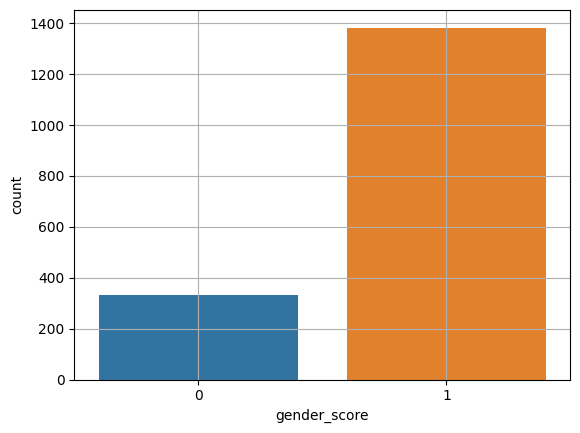

In [ ]:
sns.countplot(x='gender_score',data=details_profile_int_dr)
plt.grid()
#Male:Female~4:1
#Highlights Gender Imbalance in the dataset

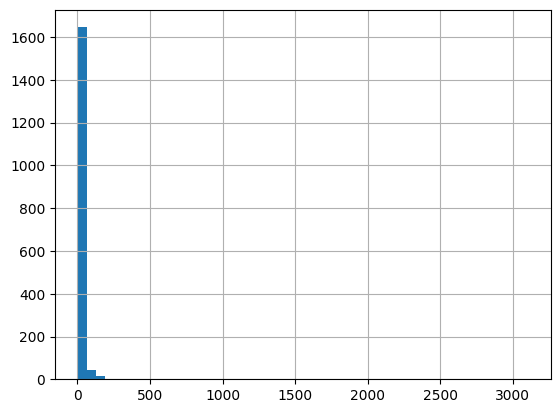

In [ ]:
#sns.displot(x='booking_count',data=details_profile_int_dr)
plt.hist(details_profile_int_dr['booking_count'],bins=50)
plt.grid()


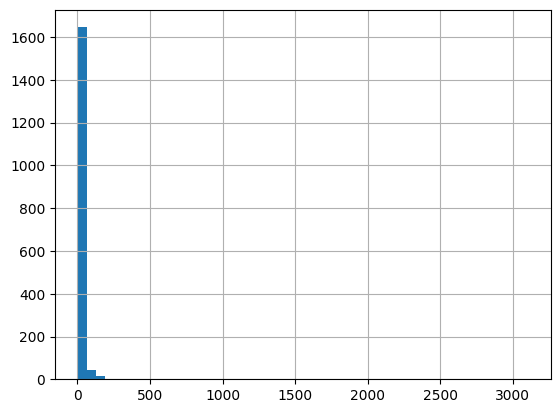

In [ ]:
#sns.displot(x='booking_count',data=details_profile_int_dr)
plt.hist(details_profile_int_dr['booking_count'],bins=50)
plt.grid()


In [ ]:
details_profile_int_dr['followers'].head(10)

0       6705.0
4       1363.0
5     106015.0
7       2552.0
8       3369.0
10     43478.0
11      6502.0
13     12058.0
14     62651.0
15     31978.0
Name: followers, dtype: float64

In [ ]:
details_profile_int_dr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1714 entries, 0 to 2477
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   booking_count                         1714 non-null   int64  
 1   age_in_days                           1714 non-null   int64  
 2   core_earning                          1714 non-null   int64  
 3   active_days                           1714 non-null   int64  
 4   followers                             1714 non-null   float64
 5   company tier numerical                1714 non-null   float64
 6   college tier numerical                1714 non-null   float64
 7   years of experience                   1714 non-null   float64
 8   # of posts/week                       1714 non-null   float64
 9   avg engagement per post last 30 days  1714 non-null   float64
 10  # of Posts last 30 days               1714 non-null   float64
 11  # of Comments las

In [ ]:
#details_profile_int_dr['followers'] = details_profile_int_dr['followers'].astype('int64')
#details_profile_int_dr['company tier numerical'] = details_profile_int_dr['company tier numerical'].astype('int64')
#details_profile_int_dr['college tier numerical'] = details_profile_int_dr['college tier numerical'].astype('int64')
#details_profile_int_dr['company tier numerical']=details_profile_int_dr['company_tier_numerical'].astype('int64')
details_profile_int_dr['company tier numerical'].dtypes

dtype('float64')

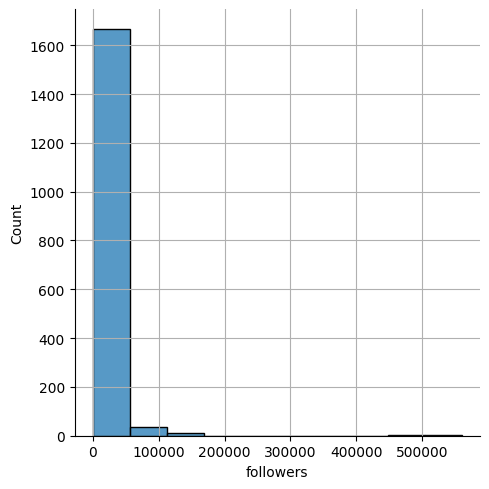

In [ ]:
#plt.hist(details_profile_int_dr['followers'],bins=10)
sns.displot(details_profile_int_dr,x='followers',binwidth=56000,bins=10)
plt.grid()

In [ ]:
details_profile_int_dr.columns

Index(['booking_count', 'age_in_days', 'core_earning', 'active_days',
       'followers', 'company tier numerical', 'college tier numerical',
       'years of experience', '# of posts/week',
       'avg engagement per post last 30 days', '# of Posts last 30 days',
       '# of Comments last 30 days', '# of Reactions last 30 days',
       'gender_score', '# of promotional posts', 'target_score'],
      dtype='object')

sns.countplot(x='company tier numerical',data=details_profile_int_dr,binwidth=56000,bins=10)
plt.grid()

<AxesSubplot: >

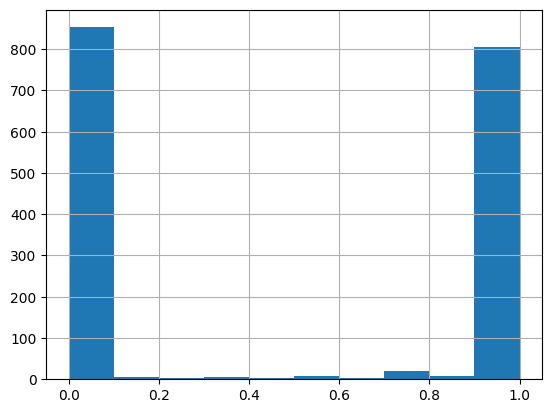

In [ ]:
details_profile_int_dr['target_score'].hist()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13552\2194667457.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  details_profile_int_dr[details_profile_int_dr['target_score']>=0.5]['target_score']=1
C:\Users\Admin\AppData\Local\Temp\ipykernel_13552\2194667457.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  details_profile_int_dr[details_profile_int_dr['target_score']<0.5]['target_score']=0
C:\Users\Admin\AppData\Local\Temp\ipykernel_13552\2194667457.py:10: SettingWithCopyWarning: 
A value is trying to b

<AxesSubplot: >

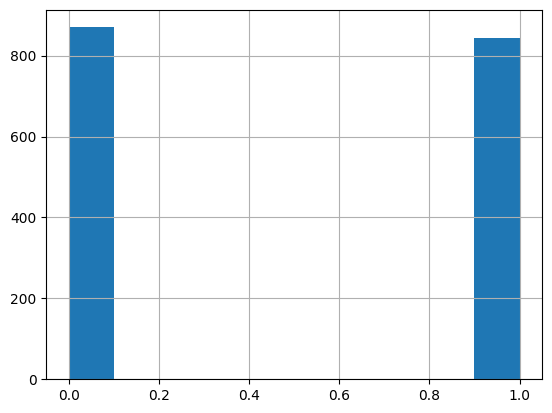

In [ ]:
def targ_to_bin(x):
    t = 0.5;
    if(x<t):
        return 0;
    else:
        return 1;

details_profile_int_dr[details_profile_int_dr['target_score']>=0.5]['target_score']=1
details_profile_int_dr[details_profile_int_dr['target_score']<0.5]['target_score']=0
details_profile_int_dr['target_score'] = details_profile_int_dr['target_score'].apply(targ_to_bin)
details_profile_int_dr['target_score'].hist()

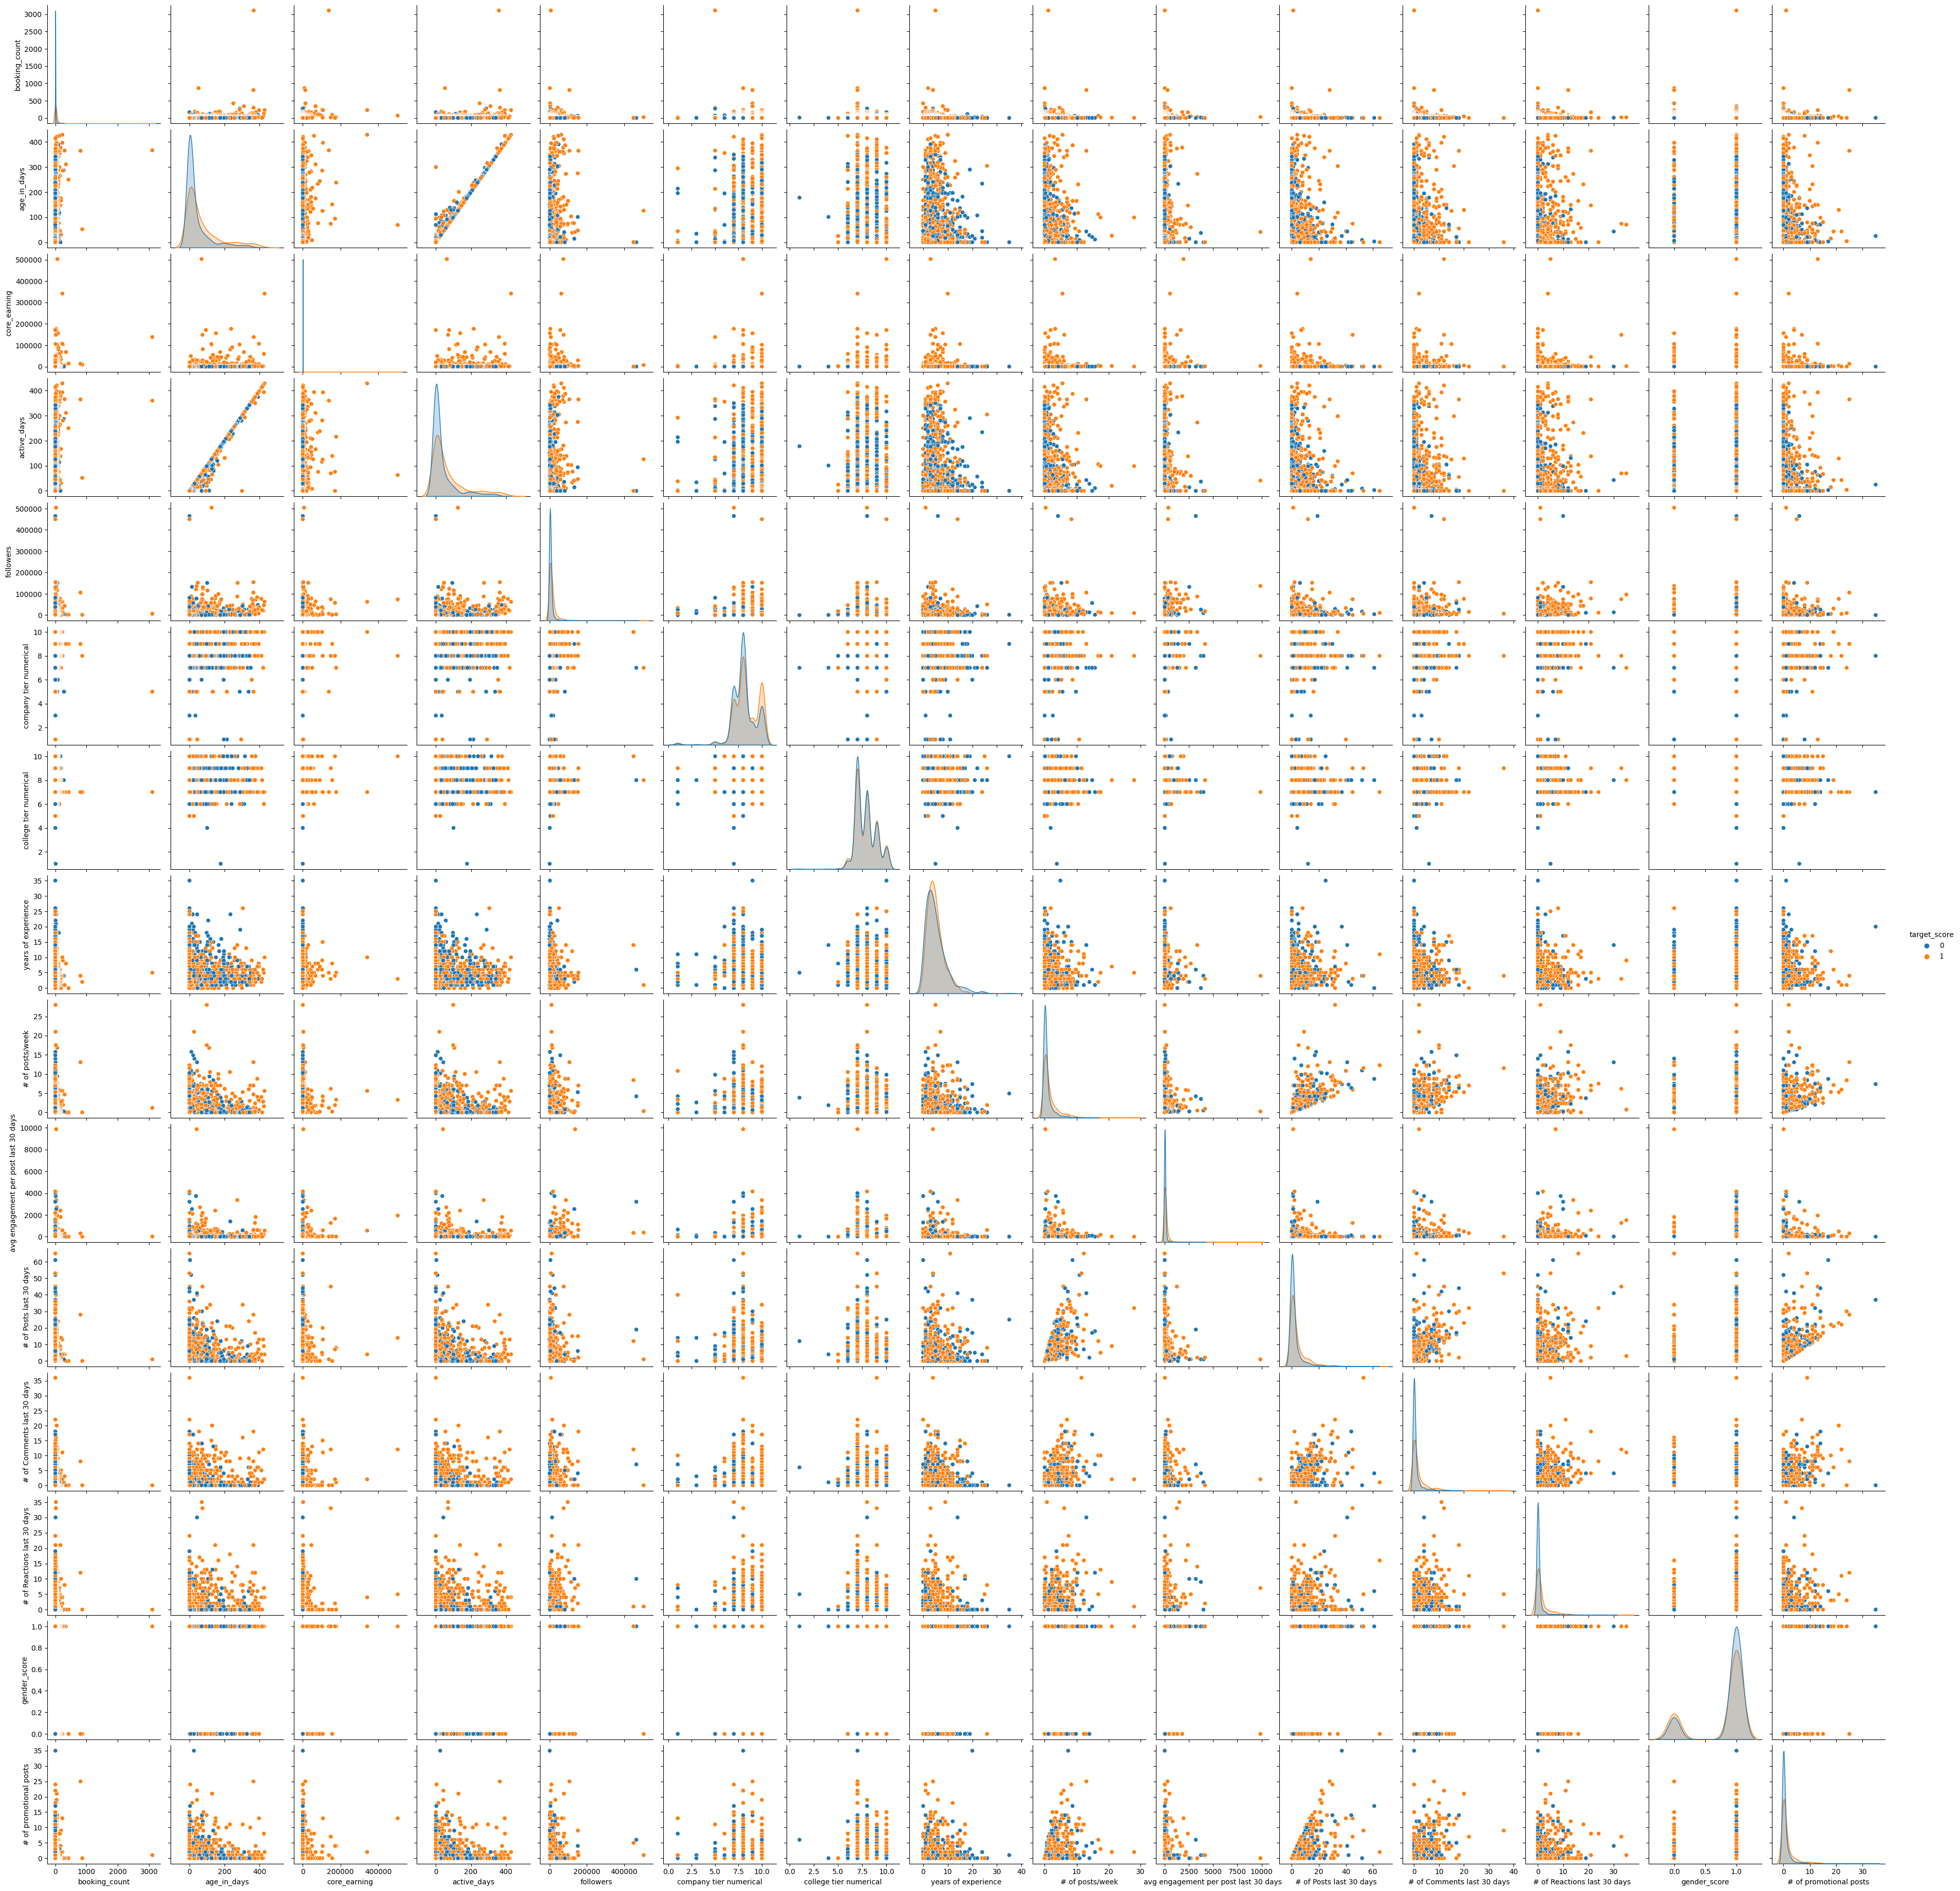

In [ ]:
sns.pairplot(details_profile_int_dr, hue='target_score')

In [ ]:
details_profile_int_dr.to_csv('Actual.csv',index=True)

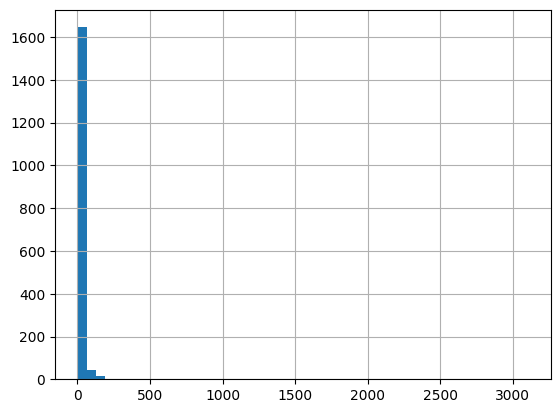

In [ ]:
#sns.displot(x='booking_count',data=details_profile_int_dr)
plt.hist(details_profile_int_dr['booking_count'],bins=50)
plt.grid()


In [ ]:
len(details_profile_int_dr.columns)

16

In [ ]:
details_profile_int_dr['followers'] = details_profile_int_dr['followers'].astype('int64')

C:\Users\Admin\AppData\Local\Temp\ipykernel_13552\206651657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  details_profile_int_dr['followers'] = details_profile_int_dr['followers'].astype('int64')


plt.figure(figsize=(12,12))
i = 1;
for ind in details_profile_int_dr.columns:
    plt.subplot(4,4,i)
    sns.scatterplot(x=ind,y='target_score',data=details_profile_int_dr)
    plt.grid()
    i=i+1;

# Feature Elimination

In [ ]:
X = details_profile_int_dr.drop(['target_score'],axis=1)
y = details_profile_int_dr['target_score']

# Train_Test_Split

In [ ]:
#!python.exe -m pip install --upgrade pip
#!pip install sklearn
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3)

# Model Building 

In [ ]:
#Importing Models for Majority Vote
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
logreg=LogisticRegression(penalty="l2")
MultiNB=MultinomialNB()
GaussNB=GaussianNB()
BernNB=BernoulliNB()
svc_clf=LinearSVC()
rfc=RandomForestClassifier(n_estimators=100,max_depth=1000)

In [ ]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 155 to 1699
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   booking_count                         1199 non-null   int64  
 1   age_in_days                           1199 non-null   int64  
 2   core_earning                          1199 non-null   int64  
 3   active_days                           1199 non-null   int64  
 4   followers                             1199 non-null   int64  
 5   company tier numerical                1199 non-null   float64
 6   college tier numerical                1199 non-null   float64
 7   years of experience                   1199 non-null   float64
 8   # of posts/week                       1199 non-null   float64
 9   avg engagement per post last 30 days  1199 non-null   float64
 10  # of Posts last 30 days               1199 non-null   float64
 11  # of Comments l

# Model Fitting

In [ ]:
details_profile_int_dr.isnull().sum()

booking_count                           0
age_in_days                             0
core_earning                            0
active_days                             0
followers                               0
company tier numerical                  0
college tier numerical                  0
years of experience                     0
# of posts/week                         0
avg engagement per post last 30 days    0
# of Posts last 30 days                 0
# of Comments last 30 days              0
# of Reactions last 30 days             0
gender_score                            0
# of promotional posts                  0
target_score                            0
dtype: int64

In [ ]:
logreg.fit(Xtrain,ytrain)
yhat_logreg=logreg.predict(Xtest)

D:\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
MultiNB.fit(Xtrain,ytrain)
yhat_MultiNB=MultiNB.predict(Xtest)

In [ ]:
GaussNB.fit(Xtrain,ytrain)
yhat_GaussNB=GaussNB.predict(Xtest)

In [ ]:
BernNB.fit(Xtrain,ytrain)
yhat_BernNB=BernNB.predict(Xtest)

In [ ]:
svc_clf.fit(Xtrain,ytrain)
yhat_svc=svc_clf.predict(Xtest)

D:\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
rfc.fit(Xtrain,ytrain)
yhat_rfc=rfc.predict(Xtest)

# Model Evaluation and Testing

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#Logistic Regression 
print("Logistic Regression")
print(classification_report(ytest,yhat_logreg))

##Multinomial Naive Bayes
print("Multinomial Naive Bayes")
print(classification_report(ytest,yhat_MultiNB))

#Gaussian Naive Bayes
print("Gaussian Naive Bayes")
print(classification_report(ytest,yhat_GaussNB))
#Gausaian Naive Bayes Model displays poor recall on the data and results in only ~50-55% accuracy overall.
#f1 score suggests overall performance

#Bernoulli Naive Bayes
print("Bernoulli Naive Bayes")
print(classification_report(ytest,yhat_BernNB))
#Despite simplicity of Bernoulli trials, it shows a good performance overall

#Support Vector Machine
print("Support Vector Machine")
print(classification_report(ytest,yhat_svc))

#Random Forest Classifier
print("Random Forest Classifier")
print(classification_report(ytest,yhat_rfc))

Logistic Regression
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       260
           1       1.00      0.98      0.99       255

    accuracy                           0.99       515
   macro avg       0.99      0.99      0.99       515
weighted avg       0.99      0.99      0.99       515

Multinomial Naive Bayes
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       260
           1       1.00      0.70      0.82       255

    accuracy                           0.85       515
   macro avg       0.89      0.85      0.85       515
weighted avg       0.88      0.85      0.85       515

Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       260
           1       0.94      0.90      0.92       255

    accuracy                           0.92       515
   macro avg       0.92      0.92      0.92       515
weighted 

# Ensemble Model- Majority Voting Model

In [ ]:
#Majority Vote Class
from scipy.stats import mode
class MajorityVote:
    def __init__(self,*classifiers):
        self.classifier=classifiers;

    def predict(self,sample,confidence=False):
        vote=[];
        for clf in self.classifier:
            plabel=clf.predict(sample)
            vote.append(plabel)
        if(confidence):
           maj_vote_count=mode(vote)[1];            
           conf=(maj_vote_count/len(vote))*100;
           return mode(vote)[0], conf        
        else:
            return mode(vote)[0]
vote_combined_clf=MajorityVote(logreg,MultiNB,BernNB,svc_clf,rfc);

In [ ]:
yhat_mvote= (vote_combined_clf.predict(Xtest)).T
print(yhat_mvote[5:10])

[[0]
 [0]
 [0]
 [1]
 [1]]


C:\Users\Admin\AppData\Local\Temp\ipykernel_13552\4172717620.py:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(vote)[0]


In [ ]:
print(classification_report(ytest,yhat_mvote))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       260
           1       1.00      0.96      0.98       255

    accuracy                           0.98       515
   macro avg       0.98      0.98      0.98       515
weighted avg       0.98      0.98      0.98       515

